# Investigate the rate of growth of the outcome space

In [8]:
import time
import pickle
from netmechanism import FeaturesLattice
from netmechanism import est_outcome_space_size, outcome_space_ratio_calculator
import matplotlib.pyplot as plt
import matplotlib
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

In [9]:
# Load data
path = 'D:/Thesis/Experiments/OutcomeSpaceSize/'
experiment_name = 'outcome_space_sizes'
with open(path + experiment_name, 'rb') as container:
    outcome_space_data = pickle.load(container)
execution_times = outcome_space_data[0]
feature_lattice_sizes = outcome_space_data[1]
outcome_space_sizes = outcome_space_data[2]
outcome_space_cov_sizes = outcome_space_data[3]

Investigation of the variation of the outcome space size increase with the targets and features lattices density for a range of dimensions.

In [10]:
# General parameters 
upper_bound = 1.0
lower_bound = -1.0
radius = 1.0
r_tol = 1e-5

In [11]:
# Experiment paramters
min_dim = 2
max_dim = 6
num_points_max = 15
num_points_min = 3

In [12]:
# Data storage structure
execution_times = {key: [] for key in range(min_dim, max_dim + 1)}
feature_lattice_sizes = {key: [] for key in range(min_dim, max_dim + 1)}
outcome_space_sizes = {key: [] for key in range(min_dim, max_dim + 1)}
outcome_space_cov_sizes = {key: [] for key in range(min_dim, max_dim + 1)}

In [13]:
# Estimate outcome space sizes and measure algorithm runtime 
for dim in range(min_dim, max_dim + 1):
    for num_points in range(num_points_min, num_points_max + 1):
        OutputLattice = FeaturesLattice()
        t_start = time.time()
        OutputLattice.generate_l2_lattice(dim = dim, radius = radius, lower_bound = lower_bound, upper_bound = upper_bound,\
                                          num_points = num_points, pos_ord = True, rel_tol = r_tol)
        t_end = time.time()
        execution_times[dim].append(t_end - t_start)
        feature_lattice_size = OutputLattice.points.shape[0]
        feature_lattice_sizes[dim].append(feature_lattice_size)
        outcome_space_sizes[dim].append(est_outcome_space_size(feature_lattice_size, dim, num_points))
        outcome_space_cov_sizes[dim].append(est_outcome_space_size(feature_lattice_size, dim, num_points, covariance_only = True))

In [14]:
# Save data
path = 'D:/Thesis/Experiments/OutcomeSpaceSize/'
experiment_name = 'outcome_space_sizes'
outcome_space_data = [execution_times, feature_lattice_sizes, outcome_space_sizes, outcome_space_cov_sizes]
with open(path + experiment_name, 'wb') as container:
    pickle.dump(outcome_space_data, container)

## Plots

### Outcome feature space size against lattice density (for both covariance and correlations release)

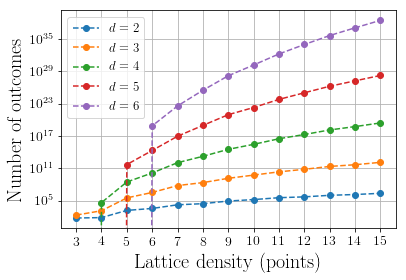

In [20]:
for dim in range(min_dim, max_dim + 1):
    plt.semilogy(range(num_points_min, num_points_max + 1), outcome_space_sizes[dim], '--o', label = r'$d = ' + str(dim) + '$')
plt.legend(fontsize = 13)
plt.xticks(range(num_points_min, num_points_max + 1))
plt.xlabel('Lattice density (points)', fontsize = 20)
plt.ylabel('Number of outcomes', fontsize = 20)
plt.grid(True)
plt.show()

In [16]:
# Can we solve the problem in six dimensions with 6 lattice points?
dim_1 = 6
dim_2 = 3
num_points_1 = 6
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(6, 6, 6)','(3, 10, 10)', str(ratio)))

Ratio of the (6, 6, 6) case compared to the (3, 10, 10) case is 1388423494.1287313


Based on the benchmark time of 95 s for (3,10,10), we conclude that it would take approximately 4182 years and 6 months to release the database...

NB: If we want to release the covariance only, then it is expected it would only take us 5.8 years...

In [13]:
# Can we solve the problem in four dimensions with 7 lattice points

In [17]:
dim_1 = 4
dim_2 = 3
num_points_1 = 7
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(4, 7, 7)','(3, 10, 10)', str(ratio)))

Ratio of the (4, 7, 7) case compared to the (3, 10, 10) case is 202.77500804012803


In [11]:
# Can we solve the problem in four dimensions with 12 lattice points?
dim_1 = 4
dim_2 = 3
num_points_1 = 12
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(4, 12, 12)','(3, 10, 10)', str(ratio)))

Ratio of the (4, 12, 12) case compared to the (3, 10, 10) case is 34352226.06905043


In about 2483 years and 7 months...

In [28]:
# How long will it take to solve (3, 12, 12) compared to (3, 10, 10)
dim_1 = 3
dim_2 = 3
num_points_1 = 12
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(3, 12, 12)','(3, 10, 10)', str(ratio)))

Ratio of the (3, 12, 12) case compared to the (3, 10, 10) case is 11.970934504944246


This should take about 20 minutes... :)

In [19]:
# Can we solve (3, 15, 15)?
dim_1 = 3
dim_2 = 3
num_points_1 = 15
num_points_2 = 10
num_points_min = 3
ratio = outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min)
print ("Ratio of the {} case compared to the {} case is {}".format('(3, 15, 15)','(3, 10, 10)', str(ratio)))
print(outcome_space_sizes)

Ratio of the (3, 15, 15) case compared to the (3, 10, 10) case is 233.65692189642414
{2: [60, 72, 1560, 3600, 17052, 27776, 84672, 159300, 356400, 505296, 987168, 1387932, 2315460], 3: [210, 1344, 327360, 3326400, 63550410, 225093120, 1409264640, 5552150400, 22406377950, 66464428800, 225621996600, 467508647424, 1297298372370], 4: [0, 43680, 292995120, 13907124000, 1125837342000, 17048302951680, 337699986140160, 2844894815884800, 31250271022027200, 190728725710168800, 1336660594816404000, 5615675341612496160, 26748034572769801200], 5: [0, 0, 503703880680, 207011171082240, 91067198475413160, 9331970875483576320, 909233188314422459040, 19519812745684707456000, 631834739383768780860000, 10590795299932548733992960, 172303922819685803584478040, 1743356548978711651560576000, 17269389321056896231470061800], 6: [0, 0, 0, 7708736058296232960, 38122293131022894232320, 31044189883099757643417600, 15230027832834793744223377920, 1516671032643839116915091020800, 171390791478978107178879323220480, 962

### Outcome feature space size against lattice density (for covariance only)

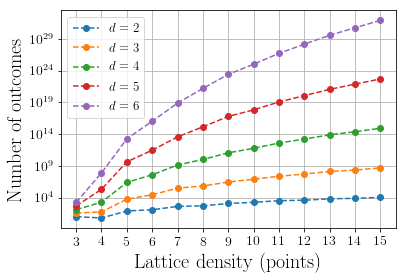

In [21]:
for dim in range(min_dim, max_dim + 1):
    plt.semilogy(range(num_points_min, num_points_max + 1), outcome_space_cov_sizes[dim], '--o', label = r'$d = ' + str(dim) + '$')
plt.legend(fontsize = 13)
plt.xticks(range(num_points_min, num_points_max + 1))
plt.xlabel('Lattice density (points)', fontsize = 20)
plt.ylabel('Number of outcomes', fontsize = 20)
plt.grid(True)
plt.show()

## Estimation of runtimes

In [46]:
tgen_2 = [0.0019948482513427734, 0.0019943714141845703, 0.0, 0.0, 0.008341550827026367, 0.009973764419555664, 0.03191423416137695, 0.04525589942932129, 0.13279199600219727, 0.15598702430725098, 0.33379030227661133, 0.4983642101287842, 0.7440059185028076, 1.2507853507995605, 1.7408859729766846, 2.3502464294433594, 3.9673285484313965, 4.983625173568726]
tgen_2 = [0.0019948482513427734, 0.0019943714141845703, 0.004943714141845703,  0.00743714141845703, 0.008341550827026367, 0.009973764419555664, 0.03191423416137695, 0.04525589942932129, 0.13279199600219727, 0.15598702430725098, 0.33379030227661133, 0.4983642101287842, 0.7440059185028076, 1.2507853507995605, 1.7408859729766846, 2.3502464294433594, 3.9673285484313965, 4.983625173568726]

tsamp_2 = [0.0009970664978027344, 0.0019960403442382812, 0.0, 0.0, 0.0009970664978027344, 0.0009980201721191406, 0.001994609832763672, 0.015621662139892578, 0.005983829498291016, 0.015622138977050781, 0.006039142608642578, 0.004059791564941406, 0.02370905876159668, 0.053244829177856445, 0.06910014152526855, 0.07810759544372559, 0.1366713047027588, 0.1721031665802002]
tgen_3 = [0.44385480880737305, 0.43265533447265625, 0.3924384117126465, 0.48853087425231934, 1.4991648197174072, 4.3277058601379395, 25.174266576766968, 94.3498260974884, 384.22021746635437, 1236.071961402893]
tsamp_3 = [0.27141356468200684, 0.27985286712646484, 0.2499701976776123, 0.35611701011657715, 0.47748875617980957, 0.736992359161377, 1.1407570838928223, 2.042597532272339, 3.5104305744171143, 6.7802839279174805]

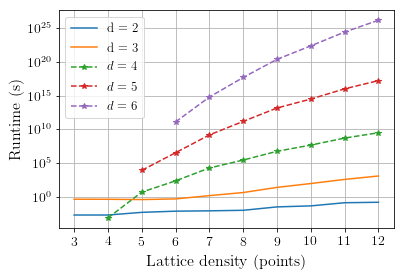

In [49]:
# Do the estimates for dimensions 4,5,6,7
baseline_time = 94.00457096099854 # based on the (3,10,10) case
dim_2 = 3
num_points_1 = 10
dim_1_min = 4
dim_1_max = 7
num_points_2_max = 12
estimated_runtimes = {key: [] for key in range(dim_1_min, dim_1_max)}
ratios = {key: [] for key in range(dim_1_min, dim_1_max)}
for dim_2 in range(dim_1_min, dim_1_max):
    for num_points_2 in range(dim_2, num_points_2_max + 1):
        estimated_runtimes[dim_2].append(baseline_time/outcome_space_ratio_calculator(outcome_space_sizes, dim_1, dim_2, num_points_1, num_points_2, num_points_min))
plt.semilogy(range(3, num_points_2_max +1 ), tgen_2[0: len(range(3, num_points_2_max + 1))], label = 'd = 2')
plt.semilogy(range(3, num_points_2_max +1 ), tgen_3[0: len(range(3, num_points_2_max + 1))], label = 'd = 3')
for dimension in estimated_runtimes.keys():
    plt.semilogy(range(dimension, num_points_2_max + 1), estimated_runtimes[dimension], '--*', label = r'$d = ' + str(dimension) + '$')
plt.xlabel ('Lattice density (points)', fontsize = 16)
plt.ylabel ('Runtime (s)', fontsize = 16)
plt.xticks(range(3,13))
plt.legend(fontsize = 13)
plt.grid(True)
plt.show()

In [36]:
estimated_runtimes.keys()

dict_keys([4, 5, 6])